### 전역변수와 지역변수

 - 프로그램을 작성하면서 여러 가지 데이터에 여러 가지 이름을 붙임 --> 이름을 알아야하니까!
 
 - 이름과 단어는 문맥에 따라 다른 의미를 가질 수 있음
 
 - 예시
 
 > 오른쪽 : right / 맞음 : right
 > 
 > 키보드에서 key는 입력 / 자물쇠 앞에서 key는 열쇠
 
 - 프로그래밍에서는‘이름공간(namespace)’이라는 개념을 이용해서 이름의 문맥을 구별
 
 - 프로그램 어디서든 부를 수 있는 이름을 전역변수(global variable)
 
 - 지역 이름공간에 정의되어, 그 문맥 속에서만 부를 수 있는 이름을 지역변수(local variable)

In [1]:
seconds_per_minute = 60                                    # 1분은 60초 ❶

def minutes_to_seconds(minutes):
    """분을 입력받아 같은 시간만큼의 초를 반환한다."""
    seconds = minutes * seconds_per_minute                 # ❷ 전역 변수를 함수 내에서 사용
    return seconds

print(minutes_to_seconds(3))                               # 화면에 180이 출력된다
print(seconds)                                             # ❸ 오류! 함수 밖에서 지역변수를 불렀다

180


NameError: name 'seconds' is not defined

### 전역변수와 지역변수의 특징 정리

 - 전역변수: 함수 밖, 전역 이름공간에 정의된 변수
 
 - 지역변수: 함수 안, 지역 이름공간에 정의된 변수
 
 - 지역변수는 그 변수가 정의된 함수 안에서만 읽을 수 있다.
 
 - 전역변수는 프로그램 어디서든 읽을 수 있다. 단, 함수 안에서 전역변수에 새로운 값을 대입할 수는 없다.

In [2]:
from IPython.display import Image

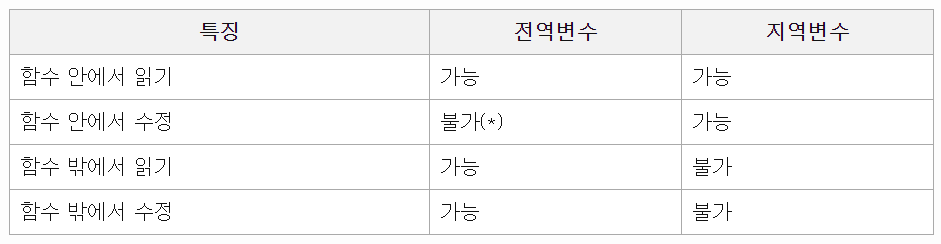

In [4]:
Image("img/00_img.png")

In [5]:
pi = 3.141592653589793

def area_of_circle(radius):
    """원의 반지름(radius)을 입력받아 넓이를 반환한다."""
    area = radius * radius * pi
    return area

def volume_of_cylinder(radius, height):
    """원기둥의 반지름(radius)과 높이(height)를 입력받아
    부피를 반환한다."""
    top_area = area_of_circle(radius)
    volume = top_area * height
    return volume

result = volume_of_cylinder(5, 10)
print(result)

785.3981633974483


### 지역변수의 운명

 - 지역변수는 함수가 실행될 때마다 새로 만들어지고, 함수의 실행이 종료되면 삭제
 
 - 즉, 함수를 실행할 때마다 함수가 이전에 계산했던 내용을 다 잊어버린 채 새로 실행
 
 - 함수의 이전 실행 결과를 기억해야 한다면 함수의 밖에서 결과를 보관 --> 전역변수로 바꾸어 주어야 함
 
 
 
### 지역변수와 전역변수의 예절(?), 도덕(?)

 - 지역변수를 이용해 그 데이터와 관련된 문제를 함수 내부의 문제로 scopic
 
 - 전역변수를 함수 안에서 수정하는 것은 좋지 않음 --> 여러 함수에서 전역변수를 건드리면 누가 건드렸는지 알 수가 없음
 
 - 그럼에도 불구하고 기억을 해야만하는 값은 아래와 같이 사용이 가능

In [7]:
num_stamp = 0                                                    # 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp():
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    num_stamp = num_stamp + 1                                   # ❶ 전역변수를 수정하려고 시도함 --> 위에서 설명한 것과 같이 no!
    print(num_stamp)
    
stamp()

UnboundLocalError: local variable 'num_stamp' referenced before assignment

In [8]:
num_stamp = 0  # 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp():
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    global num_stamp           # ❶ num_stamp는 전역변수다
    num_stamp = num_stamp + 1  # 이제 오류가 발생하지 않는다
    print(num_stamp)

stamp()  # 화면에 1이 출력된다
stamp()  # 화면에 2가 출력된다

1
2


In [9]:
num_stamp = 0  # ❶ 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp(num_stamp):  # ❷ 지역변수(매개변수) num_stamp
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    num_stamp = num_stamp + 1
    print(num_stamp)
    return num_stamp

num_stamp = stamp(num_stamp)  # ❸ 전역변수에 함수의 반환값을 대입한다
num_stamp = stamp(num_stamp)

1
2


### 이름이 없는 함수

 - 너무너무너무 간단해서 def를쓰기가 낭비인 친구가 있을 수 있음
 
 - 이를 lambda 식이라고 부름
 
 - 코드를 간략화할 때 좋음
 
 - 간단한 일회용 함수를 만들 때는 람다 식을 이용하면 좋음 ... 일회용품 : 코드라는 자연환경에 썩 좋지는 않음
 
 - 아래와 같이 사용
 
 > lambda 매개변수: 반환값

In [10]:
두_수의_곱 = lambda a, b: a * b
두_수의_곱(10, 8)

80